Dataset do Kaggle:Mall customers

# Importações

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, cluster, decomposition
from yellowbrick.cluster import KElbowVisualizer

In [45]:
data_raw = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data_raw.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# Verificando dados inconsistentes

In [19]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [20]:
data_raw.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
data_raw.duplicated().sum()

0

In [25]:
np.unique(data_raw['Genre'])

array(['Female', 'Male'], dtype=object)

Conforme verificamos acima não possuimos nenhum dado faltante, onde temos 200 linhas, nenhum dado duplicado, temos colunas do tipo inteiro e do tipo object e na coluna de valor categorico. Agora vamos atribuir ao Data Frame definitivo.

In [46]:
df = data_raw

# Exploração dos dados

In [47]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Como vemos acima teremos que efetuar uma padronização dos dados, pois a distância entre os valores das colunas é grande.

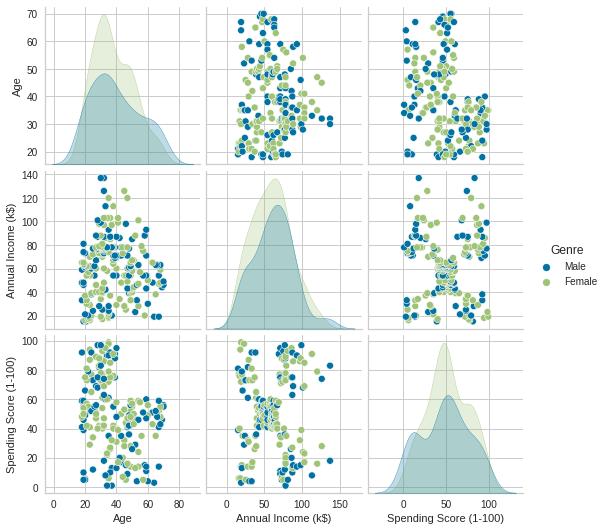

In [48]:
sns.pairplot(df, hue='Genre');

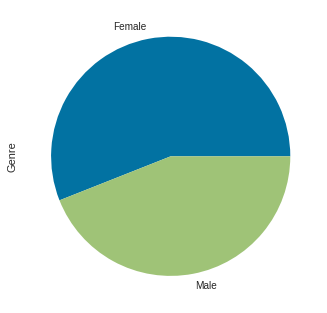

In [49]:
genero = df.groupby(['Genre'])['Genre'].count()
genero.plot.pie();

# Padronização dos dados

In [51]:
df_selecao = df.iloc[:, 1:5]
df_selecao.shape

(200, 3)

Selecionamos somente as colunas 'Age' (idade) , 'Annual Income (k$)' (Rendimento anual) e 'Spending Score (1-100)' (Pontuação de gastos) para executarmos o agrupamento.

In [52]:
df_norm = preprocessing.StandardScaler().fit_transform(df_selecao)
df_norm[0:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

Efetuamos a padronização dos dados.

# Buscando a quantidade de centroides

In [53]:
cent = []
for c in range(1, 10):
  k = cluster.KMeans(n_clusters=c, max_iter=300)
  k.fit(df_norm)
  cent.append(k.inertia_)

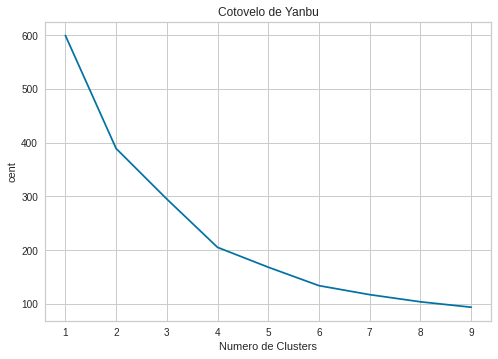

In [54]:
plt.plot(range(1, 10), cent)
plt.title('Cotovelo de Yanbu')
plt.xlabel('Numero de Clusters')
plt.ylabel('cent')
plt.show()

Podemos ver acima no gráfico, que temos o ponto do cotovelo pouco visível sendo o número de clusters em 4.Mas para termos certeza vamos executar o método KElbowVisualizer onde ele visualiza os clusters de acordo com uma função de pontuação, procurando um "cotovelo" na curva.

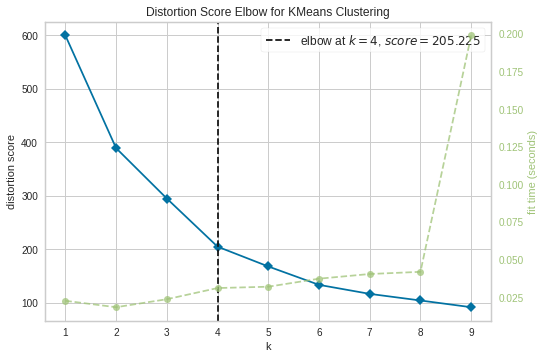

In [55]:
km = cluster.KMeans()
image = KElbowVisualizer(km, k = (1, 10))
image.fit(df_norm)
image.show();

Certo a função de pontuação também indica o número de clusters em 4, seguiremos com este número.

# Agrupamento

In [56]:
km = cluster.KMeans(n_clusters=4, max_iter=300)
km.fit(df_norm)
labels = km.labels_
labels

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 3, 2, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [57]:
df['Clusters'] = labels
df.head(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1


In [58]:
df.groupby(['Clusters']).mean()

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,53.984615,47.707692,39.969231
1,25.438596,40.000000,60.298246
2,32.875000,86.100000,81.525000
3,39.368421,86.500000,19.578947


# Visualização

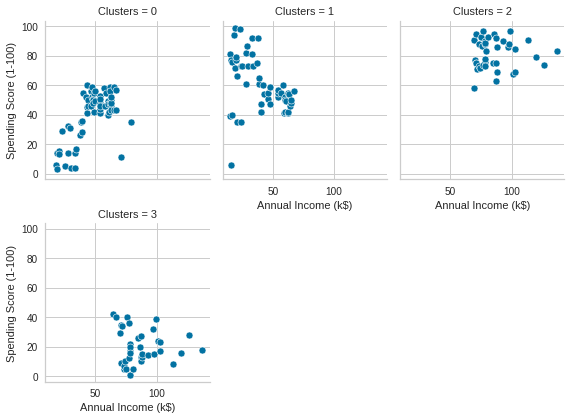

In [73]:
g = sns.FacetGrid(df, col='Clusters', height=3, aspect=.90, col_wrap=3)
g.map(sns.scatterplot, 'Annual Income (k$)', 'Spending Score (1-100)');

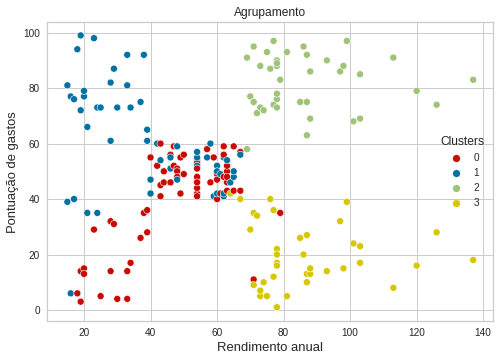

In [89]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Clusters'], palette=['r', 'b', 'g', 'y'])
plt.xlabel('Rendimento anual', fontsize=13)
plt.ylabel('Pontuação de gastos', fontsize=13)
plt.title('Agrupamento')
plt.show()